<a href="https://colab.research.google.com/github/daniilpopoff/home_work/blob/main/car_info_csv_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

plt.style.use('_mpl-gallery')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Uni kg/course work /car_info.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'name_of_car', 'dollar_price', 'som_price',
       'Year_of_Manufacture', 'Mileage', 'Body Type', 'Color', 'Engine',
       'Transmission', 'Drive', 'Steering', 'Condition', 'Customs', 'Exchange',
       'Availability', 'Region, City of Sale', 'Registration', 'Other', 'VIN',
       'some_new_value1'],
      dtype='object')

In [ ]:
df.head()


,Unnamed: 0,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,...,Steering,Condition,Customs,Exchange,Availability,"Region, City of Sale",Registration,Other,VIN,some_new_value1
0,0,Продажа Mitsubishi Montero III 3.5,$ 10 500,939 540 сом,2001,234000км,внедорожник 5 дв.,черный,3.5л/\n ...,автомат,...,слева,хорошее,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN,NaN
1,1,Продажа Toyota Sequoia II Рестайлинг 5.7,$ 63 000,5 637 240 сом,2018,112000км,внедорожник 5 дв.,белый,5.7л/\n ...,автомат,...,слева,идеальное,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN,NaN
2,2,Продажа EXEED TXL I Рестайлинг 2.0,$ 24 900,2 228 052 сом,2022,7950км,внедорожник 5 дв.,черный,2.0л/\n ...,робот,...,слева,идеальное,не растаможен,обмен не предлагать,в наличии,Бишкек,Не стоит на учёте,налог уплачен,NaN,NaN
3,3,Продажа Volkswagen Tiguan II Рестайлинг 2.0,$ 33 000,2 952 840 сом,2021,32000км,внедорожник 5 дв.,белый,2.0л/\n ...,автомат,...,слева,идеальное,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN,NaN
4,4,Продажа LiXiang L9 1.5,$ 69 200,6 192 016 сом,2023,10км,внедорожник 5 дв.,черный,1.5л/\n ...,автомат,...,слева,новое,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN,NaN


In [ ]:
df.describe()


,Unnamed: 0
count,980.000000
mean,489.500000
std,283.045933
min,0.000000
25%,244.750000
50%,489.500000
75%,734.250000
max,979.000000


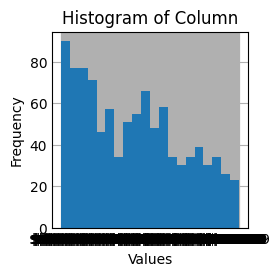

In [ ]:
df['dollar_price'].hist(bins=20)
plt.title('Histogram of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = df.drop('some_new_value1', axis = 1)


In [ ]:
df['dollar_price']= df['dollar_price'].replace('[\$, ' ']', '', regex=True).astype(int)


In [ ]:
df['dollar_price']

0      10500
1      63000
2      24900
3      33000
4      69200
       ...  
975     8046
976     5200
977     4806
978     2738
979    11999
Name: dollar_price, Length: 980, dtype: int64

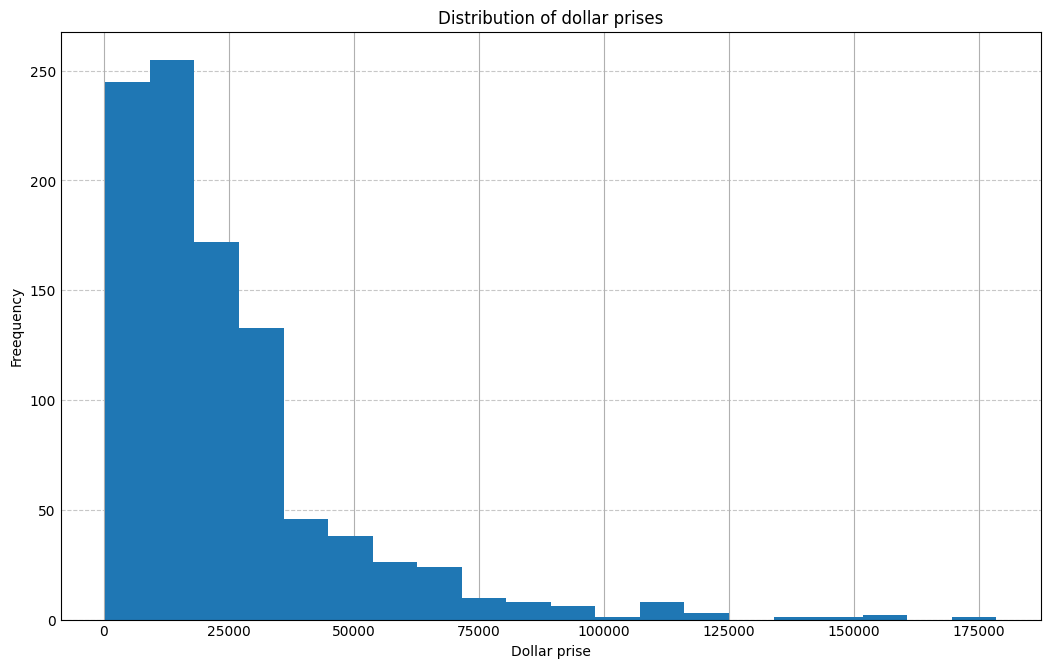

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["dollar_price"], bins = 20 )
plt.title('Distribution of dollar prises')
plt.xlabel("Dollar prise")
plt.ylabel("Freequency")
plt.grid(axis="y", linestyle='--', alpha = 0.7)
plt.show()

In [ ]:

df['Mileage'] =  df['dollar_price'].replace('[\км, ' ']', '', regex=True).astype(int)
df['Mileage']


0      10500
1      63000
2      24900
3      33000
4      69200
       ...  
975     8046
976     5200
977     4806
978     2738
979    11999
Name: Mileage, Length: 980, dtype: int64

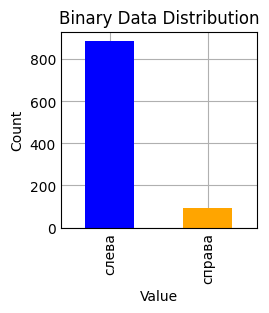

In [ ]:

# df['Steering'] = df['Steering'].replace({'слева': 1, 'справа': 0}).astype(int)
# df['Steering'].isnull().sum()
# df[df.isnull().any(axis=1)]
# df['Steering'].value_counts().get(0, 0)


# df['Steering']=df['Steering'].astype(int)
df['Steering'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Binary Data Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()



In [ ]:
df['Steering'].value_counts().get(1)


92

In [ ]:
df.describe(

)

,Unnamed: 0,dollar_price,Mileage
count,980.000000,980.000000,980.000000
mean,489.500000,24187.088776,24187.088776
std,283.045933,22807.159320,22807.159320
min,0.000000,313.000000,313.000000
25%,244.750000,9275.000000,9275.000000
50%,489.500000,17400.000000,17400.000000
75%,734.250000,30850.000000,30850.000000
max,979.000000,178500.000000,178500.000000


In [ ]:
df.head()

,Unnamed: 0,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Exchange,Availability,"Region, City of Sale",Registration,Other,VIN
0,0,Продажа Mitsubishi Montero III 3.5,10500,939 540 сом,2001,10500,внедорожник 5 дв.,черный,3.5л/\n ...,автомат,полный,слева,хорошее,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
1,1,Продажа Toyota Sequoia II Рестайлинг 5.7,63000,5 637 240 сом,2018,63000,внедорожник 5 дв.,белый,5.7л/\n ...,автомат,полный,слева,идеальное,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
2,2,Продажа EXEED TXL I Рестайлинг 2.0,24900,2 228 052 сом,2022,24900,внедорожник 5 дв.,черный,2.0л/\n ...,робот,полный,слева,идеальное,не растаможен,обмен не предлагать,в наличии,Бишкек,Не стоит на учёте,налог уплачен,NaN
3,3,Продажа Volkswagen Tiguan II Рестайлинг 2.0,33000,2 952 840 сом,2021,33000,внедорожник 5 дв.,белый,2.0л/\n ...,автомат,полный,слева,идеальное,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
4,4,Продажа LiXiang L9 1.5,69200,6 192 016 сом,2023,69200,внедорожник 5 дв.,черный,1.5л/\n ...,автомат,полный,слева,новое,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN


In [ ]:
df['som_price']= df['som_price'].replace('[сом, ' ']', '', regex=True).astype(int)
df["som_price"]
df.columns


Index(['Unnamed: 0', 'name_of_car', 'dollar_price', 'som_price',
       'Year_of_Manufacture', 'Mileage', 'Body Type', 'Color', 'Engine',
       'Transmission', 'Drive', 'Steering', 'Condition', 'Customs', 'Exchange',
       'Availability', 'Region, City of Sale', 'Registration', 'Other', 'VIN'],
      dtype='object')

In [ ]:
df = df.drop(df.columns[0], axis=1 )

In [ ]:
df_with_YM_null = df[df['Year_of_Manufacture'].isna()]
good_conditions = ("новое","хорошее", "идеальное")

condition_val  = df_with_YM_null["Condition"].isin(good_conditions)
df_with_YM_null.loc[condition_val, 'Year_of_Manufacture'] = datetime.now().year

df.update(df_with_YM_null)

df[df['Year_of_Manufacture'].isna()]
YM = df['Year_of_Manufacture']
YM_numeric = YM.apply(pd.to_numeric, errors='coerce')
YM_numeric

# seems that i need write func that look on condition and if condition in good the year wold be nowadays


0      2001.0
1      2018.0
2      2022.0
3      2021.0
4      2023.0
        ...  
975    2007.0
976    2003.0
977    2006.0
978    2008.0
979    2016.0
Name: Year_of_Manufacture, Length: 980, dtype: float64

In [ ]:
contains_floats = YM.apply(lambda x: isinstance(x, float)).any()
contains_floats


False

In [ ]:
df.head()

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Exchange,Availability,"Region, City of Sale",Registration,Other,VIN
0,Продажа Mitsubishi Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,3.5л/\n ...,автомат,полный,слева,хорошее,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
1,Продажа Toyota Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,5.7л/\n ...,автомат,полный,слева,идеальное,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
2,Продажа EXEED TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,2.0л/\n ...,робот,полный,слева,идеальное,не растаможен,обмен не предлагать,в наличии,Бишкек,Не стоит на учёте,налог уплачен,NaN
3,Продажа Volkswagen Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,2.0л/\n ...,автомат,полный,слева,идеальное,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
4,Продажа LiXiang L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,1.5л/\n ...,автомат,полный,слева,новое,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN


In [ ]:
df['name_of_car'] = df['name_of_car'].str.replace("Продажа ", "")

In [ ]:
df['Engine'] = df['Engine'].str.replace('["л/\n"]', "")
# df['Engine'].
df_with_E_null = df[df['Engine'].isna()]

df_with_E_null
df['Engine'][0]


<ipython-input-22-5f92ad30d311>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Engine'] = df['Engine'].str.replace('["л/\n"]', "")


'3.5                                                                          бензин'

In [ ]:
for column in list(df.columns):
  print(df[column].unique())



['Mitsubishi Montero III 3.5' 'Toyota Sequoia II Рестайлинг 5.7'
 'EXEED TXL I Рестайлинг 2.0' 'Volkswagen Tiguan II Рестайлинг 2.0'
 'LiXiang L9 1.5' 'Toyota Caldina III Рестайлинг 1.8' 'Changan UNI-K 2.0'
 'Hyundai Elantra VII (CN7) Рестайлинг 1.5'
 'BMW 7 серии VI (G11/G12) Рестайлинг 750Li xDrive 4.4'
 'Toyota Highlander III (U50) Рестайлинг 3.5'
 'BMW 4 Серии G22, G23, G26 420i 2.0' 'Toyota Sequoia III 3.5'
 'Lexus LX IV 600 3.5' 'Voyah Free I Рестайлинг 1.5'
 'Tesla Model 3 I Performance Electro AT (340 кВт) 4WD'
 'Geely Monjaro 2.0' 'Lexus GX I 470 4.7' 'EXEED RX I 2.0'
 'Toyota Camry VIII (XV70) 2.5' 'Ford F-150 XIII Рестайлинг 2.7'
 'BMW 5 серии VI (F10/F11/F07) 535i 3.0' 'Hyundai Sonata VIII (DN8) 2.0'
 'Kia Carnival III 2.2' 'Mitsubishi Delica IV 3.0' 'LiXiang L7 1.5'
 'BYD Song Plus 18.3 kWh 1.5' 'Lexus GX II Рестайлинг 2 460 4.6'
 'Kia K5 II Седан 2.0' 'Hyundai Santa Fe IV 2.4'
 'Honda Jazz II Рестайлинг 1.3' 'Toyota RAV4 V (XA50) 2.5'
 'Land Rover Range Rover IV Long 4.4'

In [ ]:
df.columns

Index(['name_of_car', 'dollar_price', 'som_price', 'Year_of_Manufacture',
       'Mileage', 'Body Type', 'Color', 'Engine', 'Transmission', 'Drive',
       'Steering', 'Condition', 'Customs', 'Exchange', 'Availability',
       'Region, City of Sale', 'Registration', 'Other', 'VIN'],
      dtype='object')

In [ ]:
df

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Exchange,Availability,"Region, City of Sale",Registration,Other,VIN
0,Mitsubishi Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,3.5 ...,автомат,полный,слева,хорошее,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
1,Toyota Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,5.7 ...,автомат,полный,слева,идеальное,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
2,EXEED TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,2.0 ...,робот,полный,слева,идеальное,не растаможен,обмен не предлагать,в наличии,Бишкек,Не стоит на учёте,налог уплачен,NaN
3,Volkswagen Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,2.0 ...,автомат,полный,слева,идеальное,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
4,LiXiang L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,1.5 ...,автомат,полный,слева,новое,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,налог уплачен,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Honda Civic VIII 1.8,8046,720000,2007,8046,седан,серый,1.8 ...,автомат,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,"Ош, Ошская область",Кыргызстан,"налог уплачен, техосмотр пройден",2T2**************
976,Audi A6 II (C5) Рестайлинг 2.4,5200,465296,2003,5200,седан,серый,2.4 ...,вариатор,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,"налог уплачен, техосмотр пройден",2T2**************
977,SsangYong Musso I Рестайлинг 2.9,4806,430000,2006,4806,пикап двойная кабина,серый,2.9 ...,автомат,полный,слева,хорошее,не растаможен,рассмотрю варианты,в наличии,"Ош, Ошская область",Россия,"налог уплачен, техосмотр пройден",2T2**************
978,Daewoo Matiz I Рестайлинг 0.8,2738,245000,2008,2738,хэтчбек 5 дв.,серебристый,0.8 ...,механика,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,"налог уплачен, техосмотр пройден",2T2**************


In [ ]:
contains_str = YM.apply(lambda x: isinstance(x, str)).any()
contains_str

True

In [ ]:
# похоже мне нужен код который будет делать еще и электро кары
# то есть надо сделаь для них отдельную колонку и записывать ее туда где мощность
# а так же сделать энкодинг для всего этго чтобы можно было натренировать

electro = df['Engine'].str.contains('кВт')

df['Electro'] = electro
# df['Electro Engine'] = df

df['KW'] = df['Engine'].str.extract(r'(\d+)\s?кВт')
kw_notnull = df[df['KW'].notna()]


# df.loc[kw_notnull.index, 'Engine'] = df.loc[kw_notnull.index, "KW"]


df.loc[df['Electro'] == 1, 'Engine'] = 0
df['KW']= df['KW'].fillna(0)
# df['Electro'] = df['Electro'].astype(int)
# contains_str = df['Electro'].apply(lambda x: isinstance(x, None)).any()


# new column with auto type

# i need to validate though angine and remove data a
# в общем я думаю что мне надо где литры поставить веде нули
#  а то что отдельно обвить в другую линию а лошадиные силы вообще убрать
#

In [ ]:
df.columns

Index(['name_of_car', 'dollar_price', 'som_price', 'Year_of_Manufacture',
       'Mileage', 'Body Type', 'Color', 'Engine', 'Transmission', 'Drive',
       'Steering', 'Condition', 'Customs', 'Exchange', 'Availability',
       'Region, City of Sale', 'Registration', 'Other', 'VIN', 'Electro',
       'KW'],
      dtype='object')

In [ ]:
df.drop('Other', axis=1, inplace=True)

df



,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Exchange,Availability,"Region, City of Sale",Registration,VIN,Electro,KW
0,Mitsubishi Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,3.5 ...,автомат,полный,слева,хорошее,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,NaN,False,0
1,Toyota Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,5.7 ...,автомат,полный,слева,идеальное,растаможен,обмен не предлагать,в наличии,Бишкек,Кыргызстан,NaN,False,0
2,EXEED TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,2.0 ...,робот,полный,слева,идеальное,не растаможен,обмен не предлагать,в наличии,Бишкек,Не стоит на учёте,NaN,False,0
3,Volkswagen Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,2.0 ...,автомат,полный,слева,идеальное,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,NaN,False,0
4,LiXiang L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,1.5 ...,автомат,полный,слева,новое,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Honda Civic VIII 1.8,8046,720000,2007,8046,седан,серый,1.8 ...,автомат,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,"Ош, Ошская область",Кыргызстан,2T2**************,False,0
976,Audi A6 II (C5) Рестайлинг 2.4,5200,465296,2003,5200,седан,серый,2.4 ...,вариатор,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,2T2**************,False,0
977,SsangYong Musso I Рестайлинг 2.9,4806,430000,2006,4806,пикап двойная кабина,серый,2.9 ...,автомат,полный,слева,хорошее,не растаможен,рассмотрю варианты,в наличии,"Ош, Ошская область",Россия,2T2**************,False,0
978,Daewoo Matiz I Рестайлинг 0.8,2738,245000,2008,2738,хэтчбек 5 дв.,серебристый,0.8 ...,механика,передний,слева,хорошее,растаможен,рассмотрю варианты,в наличии,Бишкек,Кыргызстан,2T2**************,False,0


In [ ]:
df.drop('Exchange', axis=1, inplace=True)
df.drop('VIN', axis=1, inplace=True)


In [ ]:
df = df[df['Electro'] != True]
df.drop('Electro', axis=1, inplace=True)



<ipython-input-31-2fe064c4229e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Electro', axis=1, inplace=True)


In [ ]:
df.drop('KW', axis=1, inplace=True)
df


<ipython-input-32-7e540954365b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('KW', axis=1, inplace=True)


,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration
0,Mitsubishi Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,3.5 ...,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан
1,Toyota Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,5.7 ...,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан
2,EXEED TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,2.0 ...,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте
3,Volkswagen Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,2.0 ...,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан
4,LiXiang L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,1.5 ...,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Honda Civic VIII 1.8,8046,720000,2007,8046,седан,серый,1.8 ...,автомат,передний,слева,хорошее,растаможен,в наличии,"Ош, Ошская область",Кыргызстан
976,Audi A6 II (C5) Рестайлинг 2.4,5200,465296,2003,5200,седан,серый,2.4 ...,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан
977,SsangYong Musso I Рестайлинг 2.9,4806,430000,2006,4806,пикап двойная кабина,серый,2.9 ...,автомат,полный,слева,хорошее,не растаможен,в наличии,"Ош, Ошская область",Россия
978,Daewoo Matiz I Рестайлинг 0.8,2738,245000,2008,2738,хэтчбек 5 дв.,серебристый,0.8 ...,механика,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан


In [ ]:
for col_name in list(df.columns):
  print(f'{col_name}, {type(df[col_name][0])}')


name_of_car, <class 'str'>
dollar_price, <class 'numpy.int64'>
som_price, <class 'numpy.int64'>
Year_of_Manufacture, <class 'str'>
Mileage, <class 'numpy.int64'>
Body Type, <class 'str'>
Color, <class 'str'>
Engine, <class 'str'>
Transmission, <class 'str'>
Drive, <class 'str'>
Steering, <class 'str'>
Condition, <class 'str'>
Customs, <class 'str'>
Availability, <class 'str'>
Region, City of Sale, <class 'str'>
Registration, <class 'str'>


In [ ]:
df['Year_of_Manufacture']= df['Year_of_Manufacture'].replace('[новый, ' ']', '', regex=True).astype(int)


<ipython-input-34-269372def877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Manufacture']= df['Year_of_Manufacture'].replace('[новый, ' ']', '', regex=True).astype(int)


In [ ]:
df['Year_of_Manufacture'].unique()

array([2001, 2018, 2022, 2021, 2023, 2007, 2019, 2005, 2020, 2010, 1997,
       2011, 2014, 2016, 2013, 2012, 2015, 2017, 2009, 2004, 2002, 2008,
       2006, 2003, 1996, 1999, 1998, 1991, 1994, 1993, 2000, 1989, 1995,
       1987, 1988, 1990])

In [ ]:
df['Year_of_Manufacture'].dtypes



dtype('int64')

In [ ]:
df['Engine']

0      3.5                                           ...
1      5.7                                           ...
2      2.0                                           ...
3      2.0                                           ...
4      1.5                                           ...
                             ...                        
975    1.8                                           ...
976    2.4                                           ...
977    2.9                                           ...
978    0.8                                           ...
979    2.0                                           ...
Name: Engine, Length: 956, dtype: object

In [ ]:
import re
df['Engine volume'] = df['Engine'].str.extract('(\d+\.\d+)').astype(float)
df['Engine fuel_type'] = df['Engine'].str.extract('([а-я]+)', flags=re.IGNORECASE)
# df.drop('Engine', axis=1, inplace=True)


<ipython-input-38-801d452b8937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine volume'] = df['Engine'].str.extract('(\d+\.\d+)').astype(float)
<ipython-input-38-801d452b8937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine fuel_type'] = df['Engine'].str.extract('([а-я]+)', flags=re.IGNORECASE)


In [ ]:
df.dropna(subset=['Engine fuel_type'], inplace=True)


<ipython-input-39-e4280b7c612d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Engine fuel_type'], inplace=True)


In [ ]:
df.head(21)

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Engine,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration,Engine volume,Engine fuel_type
0,Mitsubishi Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,3.5 ...,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин
1,Toyota Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,5.7 ...,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,5.7,бензин
2,EXEED TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,2.0 ...,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте,2.0,бензин
3,Volkswagen Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,2.0 ...,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин
4,LiXiang L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,1.5 ...,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,1.5,гибрид
5,Toyota Caldina III Рестайлинг 1.8,10500,939540,2007,10500,универсал,белый,1.8 ...,автомат,передний,справа,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,1.8,бензин
6,Changan UNI-K 2.0,28400,2541232,2023,28400,внедорожник 5 дв.,белый,2.0 ...,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин
7,Hyundai Elantra VII (CN7) Рестайлинг 1.5,20800,1861184,2023,20800,седан,белый,1.5 ...,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,1.5,бензин
8,BMW 7 серии VI (G11/G12) Рестайлинг 750Li xDri...,110000,9842800,2019,110000,седан,черный,4.4 ...,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,4.4,бензин
9,Toyota Highlander III (U50) Рестайлинг 3.5,28500,2550180,2018,28500,внедорожник 5 дв.,белый,3.5 ...,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин


In [ ]:
df['Engine']

0      3.5                                           ...
1      5.7                                           ...
2      2.0                                           ...
3      2.0                                           ...
4      1.5                                           ...
                             ...                        
975    1.8                                           ...
976    2.4                                           ...
977    2.9                                           ...
978    0.8                                           ...
979    2.0                                           ...
Name: Engine, Length: 955, dtype: object

In [ ]:
df['Engine fuel_type'] = df['Engine fuel_type'].replace('дизеь', 'дизель', regex=True)

<ipython-input-42-95c0d9df2931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine fuel_type'] = df['Engine fuel_type'].replace('дизеь', 'дизель', regex=True)


In [ ]:
df['Engine fuel_type']

0      бензин
1      бензин
2      бензин
3      бензин
4      гибрид
        ...  
975    бензин
976    бензин
977    дизель
978    бензин
979       газ
Name: Engine fuel_type, Length: 955, dtype: object

In [ ]:
df.dtypes

name_of_car              object
dollar_price              int64
som_price                 int64
Year_of_Manufacture       int64
Mileage                   int64
Body Type                object
Color                    object
Engine                   object
Transmission             object
Drive                    object
Steering                 object
Condition                object
Customs                  object
Availability             object
Region, City of Sale     object
Registration             object
Engine volume           float64
Engine fuel_type         object
dtype: object

In [ ]:
df['name_of_car'].unique

<bound method Series.unique of 0               Mitsubishi Montero III 3.5
1         Toyota Sequoia II Рестайлинг 5.7
2               EXEED TXL I Рестайлинг 2.0
3      Volkswagen Tiguan II Рестайлинг 2.0
4                           LiXiang L9 1.5
                      ...                 
975                   Honda Civic VIII 1.8
976         Audi A6 II (C5) Рестайлинг 2.4
977       SsangYong Musso I Рестайлинг 2.9
978          Daewoo Matiz I Рестайлинг 0.8
979        Hyundai Sonata VII (LF) LPi 2.0
Name: name_of_car, Length: 955, dtype: object>

In [ ]:
car_make_series = df['name_of_car'].str.split().str[0]

In [ ]:
df['Car_make'] = car_make_series

<ipython-input-47-eab3ab10b66d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_make'] = car_make_series


In [ ]:
df['name_of_car'] = df['name_of_car'].str.replace(r'^\S+\s', '', regex=True)

<ipython-input-48-49d7f0966c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name_of_car'] = df['name_of_car'].str.replace(r'^\S+\s', '', regex=True)


In [ ]:
numeric_values = df['Body Type'].str.extract('(\d+\.\d+|\d+)')
df['Door num'] = numeric_values
df[df['Door num'].isna()]
df['Door num'] = df['Door num'].fillna(5)
df['Door num'].astype(int)


<ipython-input-49-ae82a96933b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Door num'] = numeric_values
<ipython-input-49-ae82a96933b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Door num'] = df['Door num'].fillna(5)


0      5
1      5
2      5
3      5
4      5
      ..
975    5
976    5
977    5
978    5
979    5
Name: Door num, Length: 955, dtype: int64

In [ ]:
df['Door num'].unique()

array(['5', 5, '3'], dtype=object)

In [ ]:
df['Door num'] = pd.to_numeric(df['Door num'], errors='coerce', downcast='integer')
df['Door num']


<ipython-input-51-9f89039a2117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Door num'] = pd.to_numeric(df['Door num'], errors='coerce', downcast='integer')


0      5
1      5
2      5
3      5
4      5
      ..
975    5
976    5
977    5
978    5
979    5
Name: Door num, Length: 955, dtype: int8

In [ ]:
df = df.drop('Engine', axis=1)

In [ ]:
df

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration,Engine volume,Engine fuel_type,Car_make,Door num
0,Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин,Mitsubishi,5
1,Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,5.7,бензин,Toyota,5
2,TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте,2.0,бензин,EXEED,5
3,Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин,Volkswagen,5
4,L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,1.5,гибрид,LiXiang,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Civic VIII 1.8,8046,720000,2007,8046,седан,серый,автомат,передний,слева,хорошее,растаможен,в наличии,"Ош, Ошская область",Кыргызстан,1.8,бензин,Honda,5
976,A6 II (C5) Рестайлинг 2.4,5200,465296,2003,5200,седан,серый,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,2.4,бензин,Audi,5
977,Musso I Рестайлинг 2.9,4806,430000,2006,4806,пикап двойная кабина,серый,автомат,полный,слева,хорошее,не растаможен,в наличии,"Ош, Ошская область",Россия,2.9,дизель,SsangYong,5
978,Matiz I Рестайлинг 0.8,2738,245000,2008,2738,хэтчбек 5 дв.,серебристый,механика,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,0.8,бензин,Daewoo,5


In [ ]:
df[df.isna().any(axis=1)]

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration,Engine volume,Engine fuel_type,Car_make,Door num
21,Camry VIII (XV70) 2.5,32500,2908100,2020,32500,седан,синий,автомат,передний,слева,идеальное,растаможен,NaN,NaN,NaN,2.5,бензин,Toyota,5
22,GX I 470 4.7,20500,1834340,2005,20500,внедорожник 5 дв.,серый,автомат,полный,слева,идеальное,растаможен,NaN,NaN,NaN,4.7,бензин,Lexus,5
23,F-150 XIII Рестайлинг 2.7,45000,4026600,2019,45000,пикап двойная кабина,синий,автомат,полный,слева,идеальное,растаможен,NaN,NaN,NaN,2.7,бензин,Ford,5


In [ ]:
df['Availability']=df['Availability'].fillna('в наличии')
df['Region, City of Sale']=df['Region, City of Sale'].fillna('Бишкек')
df['Registration']=df['Registration'].fillna('Кыргызстан	')

In [ ]:
df.isnull().sum()


name_of_car             0
dollar_price            0
som_price               0
Year_of_Manufacture     0
Mileage                 0
Body Type               0
Color                   0
Transmission            0
Drive                   0
Steering                0
Condition               0
Customs                 0
Availability            0
Region, City of Sale    0
Registration            0
Engine volume           0
Engine fuel_type        0
Car_make                0
Door num                0
dtype: int64

In [ ]:
df

,name_of_car,dollar_price,som_price,Year_of_Manufacture,Mileage,Body Type,Color,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration,Engine volume,Engine fuel_type,Car_make,Door num
0,Montero III 3.5,10500,939540,2001,10500,внедорожник 5 дв.,черный,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин,Mitsubishi,5
1,Sequoia II Рестайлинг 5.7,63000,5637240,2018,63000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,5.7,бензин,Toyota,5
2,TXL I Рестайлинг 2.0,24900,2228052,2022,24900,внедорожник 5 дв.,черный,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте,2.0,бензин,EXEED,5
3,Tiguan II Рестайлинг 2.0,33000,2952840,2021,33000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин,Volkswagen,5
4,L9 1.5,69200,6192016,2023,69200,внедорожник 5 дв.,черный,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,1.5,гибрид,LiXiang,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Civic VIII 1.8,8046,720000,2007,8046,седан,серый,автомат,передний,слева,хорошее,растаможен,в наличии,"Ош, Ошская область",Кыргызстан,1.8,бензин,Honda,5
976,A6 II (C5) Рестайлинг 2.4,5200,465296,2003,5200,седан,серый,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,2.4,бензин,Audi,5
977,Musso I Рестайлинг 2.9,4806,430000,2006,4806,пикап двойная кабина,серый,автомат,полный,слева,хорошее,не растаможен,в наличии,"Ош, Ошская область",Россия,2.9,дизель,SsangYong,5
978,Matiz I Рестайлинг 0.8,2738,245000,2008,2738,хэтчбек 5 дв.,серебристый,механика,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,0.8,бензин,Daewoo,5


In [ ]:
df = df.drop('som_price', axis=1)

In [ ]:
df

,name_of_car,dollar_price,Year_of_Manufacture,Mileage,Body Type,Color,Transmission,Drive,Steering,Condition,Customs,Availability,"Region, City of Sale",Registration,Engine volume,Engine fuel_type,Car_make,Door num
0,Montero III 3.5,10500,2001,10500,внедорожник 5 дв.,черный,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин,Mitsubishi,5
1,Sequoia II Рестайлинг 5.7,63000,2018,63000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,5.7,бензин,Toyota,5
2,TXL I Рестайлинг 2.0,24900,2022,24900,внедорожник 5 дв.,черный,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте,2.0,бензин,EXEED,5
3,Tiguan II Рестайлинг 2.0,33000,2021,33000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин,Volkswagen,5
4,L9 1.5,69200,2023,69200,внедорожник 5 дв.,черный,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,1.5,гибрид,LiXiang,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Civic VIII 1.8,8046,2007,8046,седан,серый,автомат,передний,слева,хорошее,растаможен,в наличии,"Ош, Ошская область",Кыргызстан,1.8,бензин,Honda,5
976,A6 II (C5) Рестайлинг 2.4,5200,2003,5200,седан,серый,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,2.4,бензин,Audi,5
977,Musso I Рестайлинг 2.9,4806,2006,4806,пикап двойная кабина,серый,автомат,полный,слева,хорошее,не растаможен,в наличии,"Ош, Ошская область",Россия,2.9,дизель,SsangYong,5
978,Matiz I Рестайлинг 0.8,2738,2008,2738,хэтчбек 5 дв.,серебристый,механика,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,0.8,бензин,Daewoo,5


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Registration','Body Type', 'Color', 'Transmission', 'Drive', 'Steering', 'Condition', 'Customs', 'Availability', 'Region, City of Sale', 'Engine fuel_type', 'Car_make'])

# Now, drop the original categorical columns and use the encoded DataFrame




In [ ]:
df_encoded


,name_of_car,dollar_price,Year_of_Manufacture,Mileage,Engine volume,Door num,Registration_Абхазия,Registration_Армения,Registration_Бишкек,"Registration_Джалал-Абад, Джалал-Абадская область",...,Car_make_SsangYong,Car_make_Subaru,Car_make_Suzuki,Car_make_Tank,Car_make_Toyota,Car_make_Volkswagen,Car_make_Volvo,Car_make_Voyah,Car_make_Zeekr,Car_make_ВАЗ
0,Montero III 3.5,10500,2001,10500,3.5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sequoia II Рестайлинг 5.7,63000,2018,63000,5.7,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,TXL I Рестайлинг 2.0,24900,2022,24900,2.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tiguan II Рестайлинг 2.0,33000,2021,33000,2.0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,L9 1.5,69200,2023,69200,1.5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Civic VIII 1.8,8046,2007,8046,1.8,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,A6 II (C5) Рестайлинг 2.4,5200,2003,5200,2.4,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,Musso I Рестайлинг 2.9,4806,2006,4806,2.9,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
978,Matiz I Рестайлинг 0.8,2738,2008,2738,0.8,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_encoded.drop(['dollar_price', 'name_of_car'], axis=1)  # Features
y = df_encoded['dollar_price']  # Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

485971.7823471204

In [ ]:
# import joblib
# joblib.dump(model, 'random_forest_model.joblib')


# loaded_model = joblib.load('random_forest_model.joblib')
# new_predictions = loaded_model.predict(new_data)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

485971.7823471204

In [ ]:
!pip install joblib
import joblib
joblib.dump(model_lr, 'your_linear_regression_model_1.joblib')

['your_linear_regression_model_1.joblib']

<ipython-input-70-36006619d760>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


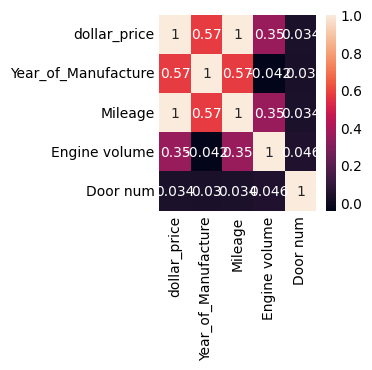

In [ ]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
y = df[['dollar_price']]
y


,dollar_price
0,10500
1,63000
2,24900
3,33000
4,69200
...,...
975,8046
976,5200
977,4806
978,2738


In [ ]:
df = df.drop(['name_of_car'], axis=1)
df = df.rename(columns={
    'Body Type': 'Body_Type',
    'Region, City of Sale': 'Region_City_of_Sale',
    'Engine fuel_type':'Engine_fuel_type',
    'Door num':'Door_num',
    'Engine volume':'Engine_volume'

})
'''Year_of_Manufacture
Mileage
Body_Type
Color
Transmission
Drive
Steering
Condition
Customs
Availability
Region_City_of_Sale
Registration
Engine_volume
Engine_fuel_type
Car_make
Door_num'''

desired_order = [
    'Mileage', 'Body_Type', 'Color', 'Transmission', 'Drive', 'Steering',
    'Condition', 'Customs', 'Availability', 'Region_City_of_Sale',
    'Registration', 'Engine_volume', 'Engine_fuel_type', 'Car_make', 'Door_num'
]

# Reorder the DataFrame columns
df = df[desired_order]



In [ ]:
df

,Mileage,Body_Type,Color,Transmission,Drive,Steering,Condition,Customs,Availability,Region_City_of_Sale,Registration,Engine_volume,Engine_fuel_type,Car_make,Door_num
0,10500,внедорожник 5 дв.,черный,автомат,полный,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,3.5,бензин,Mitsubishi,5
1,63000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,5.7,бензин,Toyota,5
2,24900,внедорожник 5 дв.,черный,робот,полный,слева,идеальное,не растаможен,в наличии,Бишкек,Не стоит на учёте,2.0,бензин,EXEED,5
3,33000,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,в наличии,Бишкек,Кыргызстан,2.0,бензин,Volkswagen,5
4,69200,внедорожник 5 дв.,черный,автомат,полный,слева,новое,растаможен,в наличии,Бишкек,Кыргызстан,1.5,гибрид,LiXiang,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,8046,седан,серый,автомат,передний,слева,хорошее,растаможен,в наличии,"Ош, Ошская область",Кыргызстан,1.8,бензин,Honda,5
976,5200,седан,серый,вариатор,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,2.4,бензин,Audi,5
977,4806,пикап двойная кабина,серый,автомат,полный,слева,хорошее,не растаможен,в наличии,"Ош, Ошская область",Россия,2.9,дизель,SsangYong,5
978,2738,хэтчбек 5 дв.,серебристый,механика,передний,слева,хорошее,растаможен,в наличии,Бишкек,Кыргызстан,0.8,бензин,Daewoo,5


In [ ]:
df = pd.get_dummies(df, columns=[	'Body_Type', 'Color', 'Transmission', 'Drive', 'Steering', 'Condition', 'Customs', 'Engine_fuel_type', 'Availability', 'Region_City_of_Sale', 'Registration', 'Car_make'])


In [ ]:
df

,Mileage,Engine_volume,Door_num,Body_Type_внедорожник 3 дв.,Body_Type_внедорожник 5 дв.,Body_Type_компактвэн,Body_Type_купе,Body_Type_лифтбек,Body_Type_минивэн,Body_Type_пикап двойная кабина,...,Car_make_SsangYong,Car_make_Subaru,Car_make_Suzuki,Car_make_Tank,Car_make_Toyota,Car_make_Volkswagen,Car_make_Volvo,Car_make_Voyah,Car_make_Zeekr,Car_make_ВАЗ
0,10500,3.5,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63000,5.7,5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,24900,2.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33000,2.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,69200,1.5,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,8046,1.8,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,5200,2.4,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,4806,2.9,5,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
978,2738,0.8,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.dropna()


In [ ]:
X = df

In [ ]:
# X = df.drop(['dollar_price',], axis=1)
x_col = X.columns
with open ('columns_f.txt', 'w') as file:
  for col in x_col:
    file.write(col + '\n')

In [ ]:
# y = df[['dollar_price', 'som_price']]
# y


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr_final = LinearRegression()

# Train the model
model_lr_final.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_train = model_lr_final.predict(X_train_scaled)
y_pred_test = model_lr_final.predict(X_test_scaled)


mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("MSE on Training Data:", mse_train)
print("MSE on Test Data:", mse_test)
print("Predicted values on Test Data:", y_pred_test)



MSE on Training Data: 1.7789493500376024e-21
MSE on Test Data: 25352.557468699706
Predicted values on Test Data: [[ 45500.        ]
 [ 11000.        ]
 [ 10900.        ]
 [  2012.        ]
 [ 21300.        ]
 [  4303.        ]
 [ 24000.        ]
 [ 72500.        ]
 [ 24500.        ]
 [ 30000.        ]
 [ 41500.        ]
 [ 16580.        ]
 [ 53500.        ]
 [ 42900.        ]
 [ 21500.        ]
 [ 39500.        ]
 [ 23300.        ]
 [  3800.        ]
 [ 13000.        ]
 [  1844.        ]
 [ 38090.        ]
 [ 11700.        ]
 [ 27300.        ]
 [ 12800.        ]
 [ 19800.        ]
 [ 29600.        ]
 [ 30500.        ]
 [  4498.72753764]
 [  7600.        ]
 [ 61309.        ]
 [ 15800.        ]
 [  9500.        ]
 [ 27000.        ]
 [ 16500.        ]
 [ 13700.        ]
 [ 32500.        ]
 [  2012.        ]
 [ 10500.        ]
 [ 25000.        ]
 [ 29800.        ]
 [ 55000.        ]
 [  5800.        ]
 [ 30500.        ]
 [  3297.        ]
 [ 36500.        ]
 [  3353.        ]
 [ 69500.    

In [ ]:
mse = mean_squared_error(X_test_scaled, y_pred)
mse

ValueError: ignored

In [ ]:
joblib.dump(model_lr_final, 'final_linear_regression_model.joblib')

['final_linear_regression_model.joblib']